In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# Hp
latent_dim = 100  # Size of the random noise vector
image_size = 64   # Resized to 64x64
channels_img = 3  # RGB images
batch_size = 128
learning_rate = 0.0002
num_epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [9]:
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5] * channels_img, [0.5] * channels_img)  # Normalize to range [-1, 1]
])

# Load dataset
dataset = torchvision.datasets.CelebA(root="./data", split="train", transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4)


Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=bb0385b7-cf50-452f-9aeb-03b3f013447d
To: /content/data/celeba/img_align_celeba.zip
100%|██████████| 1.44G/1.44G [00:21<00:00, 65.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: /content/data/celeba/list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:00<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: /content/data/celeba/identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 22.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: /content/data/celeba/list_bbox_celeba.txt
100%|██████████| 6.08M/6.08M [00:00<00:00, 22.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pd0FJY3Blby1HUTQ
To: /content/data/celeba/list_landm

In [10]:
class Generator(nn.Module):
    def __init__(self, latent_dim, channels_img):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),  # Reshape into 128x8x8

            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.ConvTranspose2d(32, channels_img, kernel_size=4, stride=2, padding=1),  # 64x64
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

In [11]:
class Discriminator(nn.Module):
    def __init__(self, channels_img):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(channels_img, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.LeakyReLU(0.2),

            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 8x8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)


In [12]:
# Initialize models
generator = Generator(latent_dim, channels_img).to(device)
discriminator = Discriminator(channels_img).to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

criterion = nn.BCELoss()


Epoch [1/10], Batch 0, D Loss: 0.7047, G Loss: 0.9483
Epoch [1/10], Batch 100, D Loss: 0.0150, G Loss: 5.8246
Epoch [1/10], Batch 200, D Loss: 0.0699, G Loss: 7.5078
Epoch [1/10], Batch 300, D Loss: 0.1787, G Loss: 1.8815
Epoch [1/10], Batch 400, D Loss: 0.3844, G Loss: 0.7799
Epoch [1/10], Batch 500, D Loss: 0.4984, G Loss: 1.0189
Epoch [1/10], Batch 600, D Loss: 0.1335, G Loss: 4.5549
Epoch [1/10], Batch 700, D Loss: 0.1383, G Loss: 3.0028
Epoch [1/10], Batch 800, D Loss: 0.0651, G Loss: 3.4695
Epoch [1/10], Batch 900, D Loss: 0.0889, G Loss: 3.7507
Epoch [1/10], Batch 1000, D Loss: 0.1572, G Loss: 2.8847
Epoch [1/10], Batch 1100, D Loss: 0.1440, G Loss: 3.6068
Epoch [1/10], Batch 1200, D Loss: 0.1732, G Loss: 3.1146


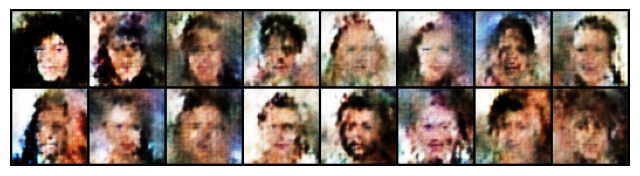

Epoch [2/10], Batch 0, D Loss: 0.0898, G Loss: 4.0122
Epoch [2/10], Batch 100, D Loss: 0.0985, G Loss: 3.7924
Epoch [2/10], Batch 200, D Loss: 0.1216, G Loss: 3.0843
Epoch [2/10], Batch 300, D Loss: 0.1075, G Loss: 2.9874
Epoch [2/10], Batch 400, D Loss: 0.1269, G Loss: 2.4856
Epoch [2/10], Batch 500, D Loss: 0.1046, G Loss: 2.5891
Epoch [2/10], Batch 600, D Loss: 0.1696, G Loss: 2.0415
Epoch [2/10], Batch 700, D Loss: 0.1807, G Loss: 1.7231
Epoch [2/10], Batch 800, D Loss: 0.1551, G Loss: 3.0842
Epoch [2/10], Batch 900, D Loss: 0.7339, G Loss: 5.1782
Epoch [2/10], Batch 1000, D Loss: 0.1673, G Loss: 2.9957
Epoch [2/10], Batch 1100, D Loss: 0.1628, G Loss: 2.3893
Epoch [2/10], Batch 1200, D Loss: 0.1003, G Loss: 3.7393


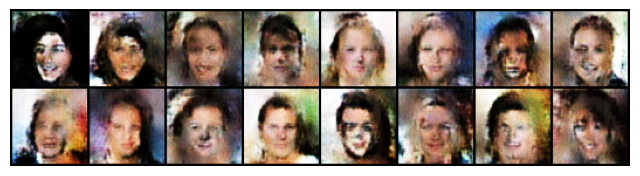

Epoch [3/10], Batch 0, D Loss: 0.1298, G Loss: 2.6693
Epoch [3/10], Batch 100, D Loss: 0.4192, G Loss: 1.7707
Epoch [3/10], Batch 200, D Loss: 0.1092, G Loss: 2.6711
Epoch [3/10], Batch 300, D Loss: 0.1277, G Loss: 2.1551
Epoch [3/10], Batch 400, D Loss: 0.0887, G Loss: 2.9026
Epoch [3/10], Batch 500, D Loss: 0.1056, G Loss: 3.5283
Epoch [3/10], Batch 600, D Loss: 0.1213, G Loss: 2.6262
Epoch [3/10], Batch 700, D Loss: 0.1160, G Loss: 2.4001
Epoch [3/10], Batch 800, D Loss: 0.1026, G Loss: 3.1882
Epoch [3/10], Batch 900, D Loss: 0.0976, G Loss: 2.8269
Epoch [3/10], Batch 1000, D Loss: 0.1005, G Loss: 2.8726
Epoch [3/10], Batch 1100, D Loss: 0.1247, G Loss: 3.1893
Epoch [3/10], Batch 1200, D Loss: 0.1253, G Loss: 3.6049


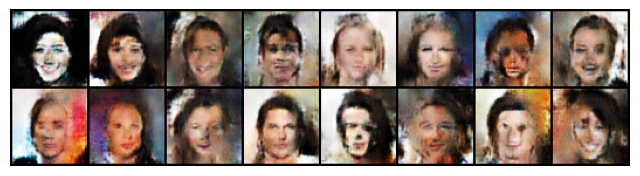

Epoch [4/10], Batch 0, D Loss: 0.1209, G Loss: 3.9911
Epoch [4/10], Batch 100, D Loss: 0.2787, G Loss: 3.7342
Epoch [4/10], Batch 200, D Loss: 0.1390, G Loss: 2.0751
Epoch [4/10], Batch 300, D Loss: 0.0829, G Loss: 2.6469
Epoch [4/10], Batch 400, D Loss: 0.1327, G Loss: 2.4730
Epoch [4/10], Batch 500, D Loss: 0.0854, G Loss: 3.5787
Epoch [4/10], Batch 600, D Loss: 0.1705, G Loss: 2.7389
Epoch [4/10], Batch 700, D Loss: 0.0922, G Loss: 3.2177
Epoch [4/10], Batch 800, D Loss: 1.6265, G Loss: 0.0115
Epoch [4/10], Batch 900, D Loss: 0.1029, G Loss: 2.5551
Epoch [4/10], Batch 1000, D Loss: 0.1881, G Loss: 3.0802
Epoch [4/10], Batch 1100, D Loss: 0.0698, G Loss: 3.3065
Epoch [4/10], Batch 1200, D Loss: 0.0926, G Loss: 3.0500


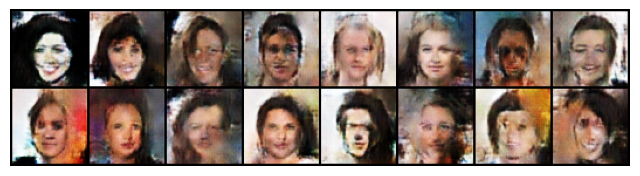

Epoch [5/10], Batch 0, D Loss: 0.0793, G Loss: 3.4988
Epoch [5/10], Batch 100, D Loss: 0.0998, G Loss: 2.6345
Epoch [5/10], Batch 200, D Loss: 0.1028, G Loss: 3.6284
Epoch [5/10], Batch 300, D Loss: 0.0558, G Loss: 3.2586
Epoch [5/10], Batch 400, D Loss: 0.0721, G Loss: 3.2524
Epoch [5/10], Batch 500, D Loss: 0.1479, G Loss: 2.6194
Epoch [5/10], Batch 600, D Loss: 0.1162, G Loss: 2.4318
Epoch [5/10], Batch 700, D Loss: 1.1430, G Loss: 2.6544
Epoch [5/10], Batch 800, D Loss: 0.2141, G Loss: 2.8605
Epoch [5/10], Batch 900, D Loss: 0.0677, G Loss: 3.5531
Epoch [5/10], Batch 1000, D Loss: 0.0915, G Loss: 2.8342
Epoch [5/10], Batch 1100, D Loss: 0.0700, G Loss: 3.0573
Epoch [5/10], Batch 1200, D Loss: 0.1363, G Loss: 3.7223


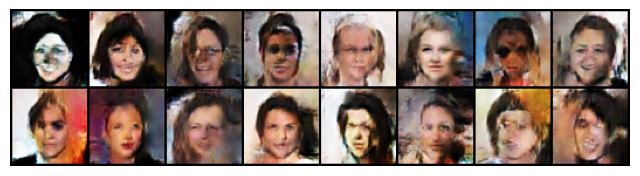

Epoch [6/10], Batch 0, D Loss: 0.1248, G Loss: 3.9409
Epoch [6/10], Batch 100, D Loss: 0.0633, G Loss: 3.5903
Epoch [6/10], Batch 200, D Loss: 0.2348, G Loss: 2.5120
Epoch [6/10], Batch 300, D Loss: 0.0773, G Loss: 3.0980
Epoch [6/10], Batch 400, D Loss: 1.5696, G Loss: 8.1760
Epoch [6/10], Batch 500, D Loss: 0.0724, G Loss: 3.2000
Epoch [6/10], Batch 600, D Loss: 0.0836, G Loss: 3.0654
Epoch [6/10], Batch 700, D Loss: 0.3915, G Loss: 1.8335
Epoch [6/10], Batch 800, D Loss: 0.0663, G Loss: 3.6883
Epoch [6/10], Batch 900, D Loss: 0.0815, G Loss: 3.0122
Epoch [6/10], Batch 1000, D Loss: 0.2462, G Loss: 4.9156
Epoch [6/10], Batch 1100, D Loss: 0.0745, G Loss: 3.4339
Epoch [6/10], Batch 1200, D Loss: 0.3328, G Loss: 4.8607


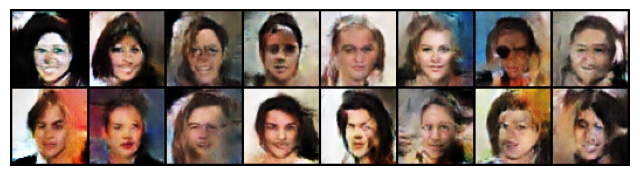

Epoch [7/10], Batch 0, D Loss: 0.1105, G Loss: 2.5857
Epoch [7/10], Batch 100, D Loss: 0.0634, G Loss: 3.8858
Epoch [7/10], Batch 200, D Loss: 0.0938, G Loss: 2.4418
Epoch [7/10], Batch 300, D Loss: 1.1055, G Loss: 0.4316
Epoch [7/10], Batch 400, D Loss: 0.1423, G Loss: 3.3385
Epoch [7/10], Batch 500, D Loss: 0.2111, G Loss: 4.3006
Epoch [7/10], Batch 600, D Loss: 0.0970, G Loss: 2.6760
Epoch [7/10], Batch 700, D Loss: 0.0714, G Loss: 3.1518
Epoch [7/10], Batch 800, D Loss: 0.1749, G Loss: 3.7051
Epoch [7/10], Batch 900, D Loss: 0.1015, G Loss: 2.9007
Epoch [7/10], Batch 1000, D Loss: 0.0559, G Loss: 4.2133
Epoch [7/10], Batch 1100, D Loss: 0.0994, G Loss: 2.7240
Epoch [7/10], Batch 1200, D Loss: 0.0524, G Loss: 3.8168


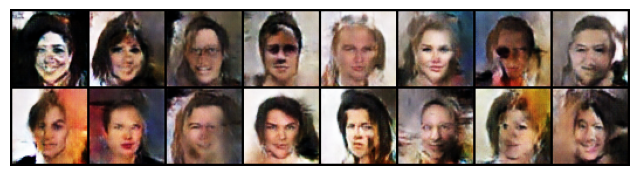

Epoch [8/10], Batch 0, D Loss: 0.0795, G Loss: 3.7034
Epoch [8/10], Batch 100, D Loss: 0.0771, G Loss: 3.1766
Epoch [8/10], Batch 200, D Loss: 0.6866, G Loss: 3.9192
Epoch [8/10], Batch 300, D Loss: 0.0992, G Loss: 2.9205
Epoch [8/10], Batch 400, D Loss: 0.0734, G Loss: 4.1097
Epoch [8/10], Batch 500, D Loss: 0.4294, G Loss: 1.2560
Epoch [8/10], Batch 600, D Loss: 0.0912, G Loss: 2.5678
Epoch [8/10], Batch 700, D Loss: 0.0700, G Loss: 3.7707
Epoch [8/10], Batch 800, D Loss: 0.0748, G Loss: 2.8025
Epoch [8/10], Batch 900, D Loss: 0.0724, G Loss: 3.4215
Epoch [8/10], Batch 1000, D Loss: 0.0960, G Loss: 3.0484
Epoch [8/10], Batch 1100, D Loss: 0.0888, G Loss: 2.6145
Epoch [8/10], Batch 1200, D Loss: 0.0671, G Loss: 3.1348


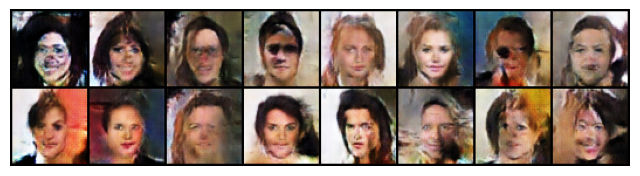

Epoch [9/10], Batch 0, D Loss: 0.4063, G Loss: 1.1830
Epoch [9/10], Batch 100, D Loss: 0.4043, G Loss: 4.8441
Epoch [9/10], Batch 200, D Loss: 0.1252, G Loss: 1.9099
Epoch [9/10], Batch 300, D Loss: 0.1065, G Loss: 4.1236
Epoch [9/10], Batch 400, D Loss: 0.0985, G Loss: 3.5521
Epoch [9/10], Batch 500, D Loss: 0.0515, G Loss: 3.8193
Epoch [9/10], Batch 600, D Loss: 0.2099, G Loss: 2.2327
Epoch [9/10], Batch 700, D Loss: 0.4454, G Loss: 4.2444
Epoch [9/10], Batch 800, D Loss: 0.0698, G Loss: 3.0730
Epoch [9/10], Batch 900, D Loss: 0.0446, G Loss: 3.8461
Epoch [9/10], Batch 1000, D Loss: 0.4600, G Loss: 0.9803
Epoch [9/10], Batch 1100, D Loss: 0.0700, G Loss: 3.9772
Epoch [9/10], Batch 1200, D Loss: 0.0606, G Loss: 3.6769


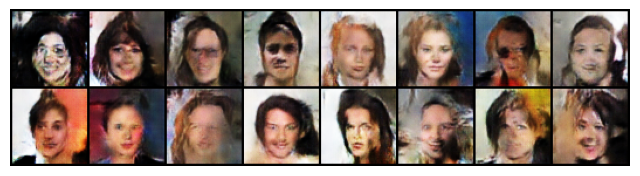

Epoch [10/10], Batch 0, D Loss: 0.0749, G Loss: 3.0386
Epoch [10/10], Batch 100, D Loss: 1.7687, G Loss: 9.8191
Epoch [10/10], Batch 200, D Loss: 0.0973, G Loss: 3.1030
Epoch [10/10], Batch 300, D Loss: 0.0669, G Loss: 3.3203
Epoch [10/10], Batch 400, D Loss: 0.0593, G Loss: 3.6394
Epoch [10/10], Batch 500, D Loss: 0.0714, G Loss: 3.7339
Epoch [10/10], Batch 600, D Loss: 0.0977, G Loss: 2.3594
Epoch [10/10], Batch 700, D Loss: 0.1593, G Loss: 3.1613
Epoch [10/10], Batch 800, D Loss: 0.0627, G Loss: 3.6550
Epoch [10/10], Batch 900, D Loss: 0.0918, G Loss: 3.6363
Epoch [10/10], Batch 1000, D Loss: 0.0753, G Loss: 3.0461
Epoch [10/10], Batch 1100, D Loss: 0.0522, G Loss: 4.1880
Epoch [10/10], Batch 1200, D Loss: 0.0762, G Loss: 3.2627


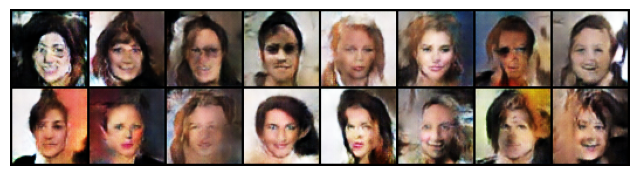

In [6]:
fixed_noise = torch.randn(16, latent_dim).to(device)  # Fixed noise to visualize generator progress

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Labels for real (1) and fake (0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        optimizer_D.zero_grad()


        real_preds = discriminator(real_images)
        loss_real = criterion(real_preds, real_labels)


        noise = torch.randn(batch_size, latent_dim).to(device)
        fake_images = generator(noise)
        fake_preds = discriminator(fake_images.detach())
        loss_fake = criterion(fake_preds, fake_labels)

        loss_D = (loss_real + loss_fake) / 2
        loss_D.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()

        fake_preds = discriminator(fake_images)
        loss_G = criterion(fake_preds, real_labels)  # Fool discriminator
        loss_G.backward()
        optimizer_G.step()

        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch {i}, D Loss: {loss_D.item():.4f}, G Loss: {loss_G.item():.4f}")

    # Generate sample images after each epoch
    with torch.no_grad():
        fake_images = generator(fixed_noise).cpu()
        grid = make_grid(fake_images, normalize=True)
        plt.figure(figsize=(8, 8))
        plt.imshow(grid.permute(1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
        plt.axis("off")
        plt.show()
